# Text Analysis

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import ngrams

In [2]:
data_path = '../data/SQuAD_train_augmented_DF.h5'

In [3]:
df = pd.read_hdf(data_path, 'df_train')

In [4]:
def text_extraction(text_list):
    """
    This function extracts text from a list of (text, POS)
     
    Args:
        text_list: A list containing the text to process.
    
    Returns:
        Text string separated by a space
    """
    text_list = list(map(list,text_list))
    out_text = []
    for tup in text_list:
        if type(tup[0][0]) != tuple:
            out_text.append(tup[0][0])  
    return ' '.join(out_text)

In [37]:
df_sentences = pd.DataFrame(columns=['context', 'question', 'text'])

In [38]:
df_sentences['context'] = df['context'].apply(text_extraction)
df_sentences['question'] = df['question'].apply(text_extraction)
df_sentences['text'] = df['text'].apply(text_extraction)

In [7]:
df_sentences.head()

,context,question,text
0,"boston public school enrol 57,000 student atte...",mani student boston public school ?,"57,000"
1,"arizona , south gila river legal bought mexico...",name deal arizona bought ?,gadsden purchas
2,"exhibit game may also use settl challeng , pro...",exhibit game rais money ?,chariti
3,bronx featur significantli fiction literatur ....,wrote 'citi boy : adventur herbi bookbind ' ?,herman wouk
4,"new delhi govern municip govern , known new de...",new delhi municip govern overse larg indian ci...,new delhi


In [17]:
df_sentences['context'].str.split().explode().value_counts().nlargest(50)

context
,          511137
.          326191
c           82240
s           76731
)           72360
(           72308
p           60492
a           58263
m           46778
r           42981
's          42144
e           41571
d           38927
t           37607
``          36695
''          36465
f           36121
b           34795
i           32293
l           31415
h           24025
'           23708
g           23665
w           22672
n           21193
o           20136
;           18956
u           18567
state       18318
also        17568
1           17261
use         16996
citi        14875
one         14080
includ      13689
new         13529
first       13502
:           11967
%           11571
v           11406
year        11142
time        10899
mani        10033
2            9712
unit         9347
world        9143
two          9009
centuri      8852
j            8430
war          8366
Name: count, dtype: int64

In [18]:
df_sentences['question'].str.split().explode().value_counts().nlargest(50)

question
?          66555
c           6527
,           5577
s           5518
's          5353
p           4887
m           4167
a           3979
mani        3548
e           3066
t           2985
r           2983
b           2779
d           2759
f           2736
year        2607
l           2387
use         2349
i           2087
name        2075
'           2055
g           1851
first       1845
u           1842
h           1707
w           1654
n           1590
type        1564
o           1439
citi        1291
new         1254
state       1173
peopl       1114
``          1030
call        1029
''          1016
time        1010
countri      978
two          888
group        874
one          846
locat        839
v            825
much         815
term         760
war          752
languag      704
system       689
part         688
area         684
Name: count, dtype: int64

In [19]:
df_sentences['text'].str.split().explode().value_counts().nlargest(50)

text
,          5937
c          2522
s          2401
p          1818
a          1723
m          1614
.          1462
t          1250
1          1223
b          1219
d          1207
r          1202
f          1137
e          1121
(          1064
)          1034
l           954
%           933
g           889
's          887
i           857
h           817
``          754
''          745
n           716
w           648
2           611
million     597
u           566
'           542
o           533
state       515
v           445
j           436
centuri     420
$           404
new         377
year        377
unit        364
two         362
one         332
nation      317
k           312
war         306
three       293
univers     287
world       266
govern      265
citi        254
system      247
Name: count, dtype: int64

In [39]:
df_sentences['context'].str.split().apply(lambda x: list(map(' '.join, ngrams(x, n=3))))

0        [boston public school, public school enrol, sc...
1        [arizona , south, , south gila, south gila riv...
2        [exhibit game may, game may also, may also use...
3        [bronx featur significantli, featur significan...
4        [new delhi govern, delhi govern municip, gover...
                               ...                        
67270    [h s p, s p p, p p r, p r ,, r , e, , e -, e -...
67271    [n d m, d m j, m j i, j i r, i r n, r n h, n h...
67272    [a p r, p r m, r m ,, m , a, , a d, a d n, d n...
67273    [c e ,, e , -, , - n, - n w, n w c, w c ., c ....
67274    [p s d, s d a, d a u, a u f, u f ., f . a, . a...
Name: context, Length: 67275, dtype: object

## Since we have processed the tokens and the strings so much, as this point our tokens are not readable anymore so there isn't much to conclude

## Observation: a lot of our words in context have been reduced to single characters

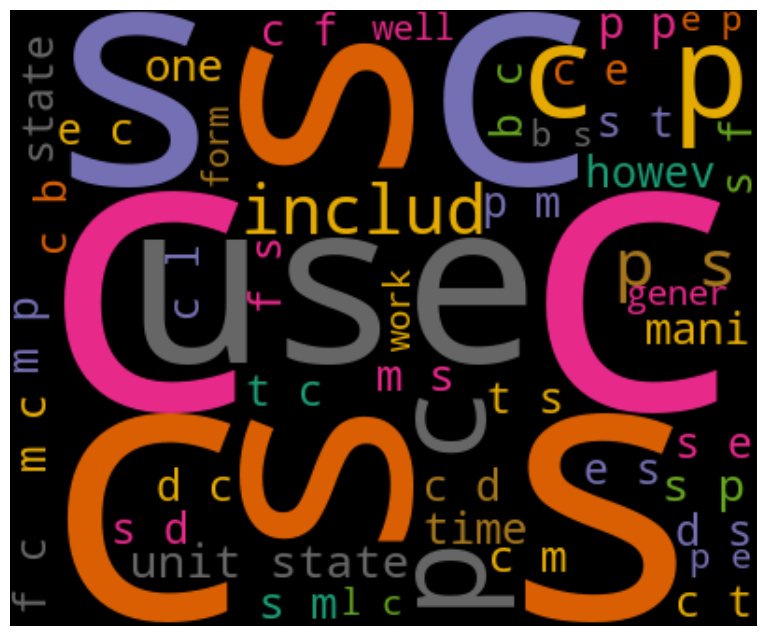

In [8]:
wc_context = WordCloud(width=400, height=330, max_words=50, colormap="Dark2", include_numbers=True).generate(df_sentences['context'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(wc_context, interpolation='bilinear')
plt.axis("off")
plt.show()

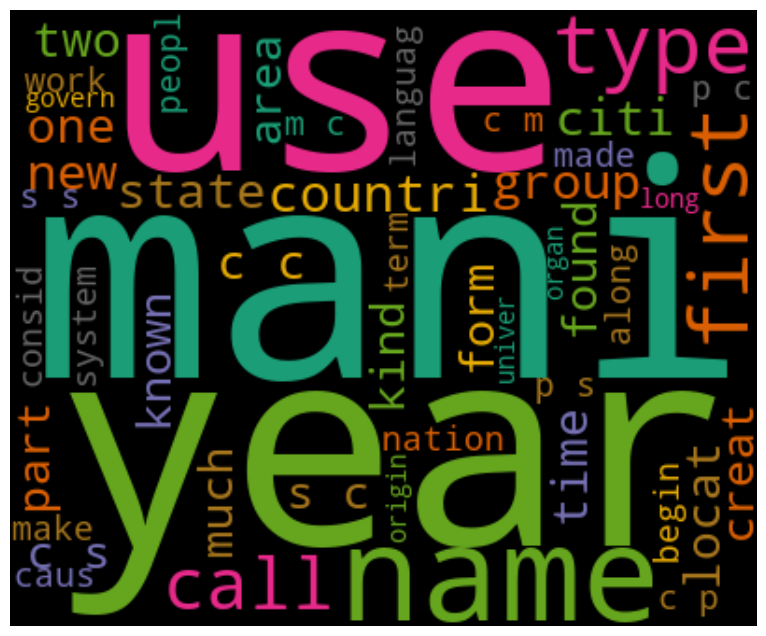

In [9]:
wc_question = WordCloud(width=400, height=330, max_words=50, colormap="Dark2", include_numbers=True).generate(df_sentences['question'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(wc_question, interpolation='bilinear')
plt.axis("off")
plt.show()

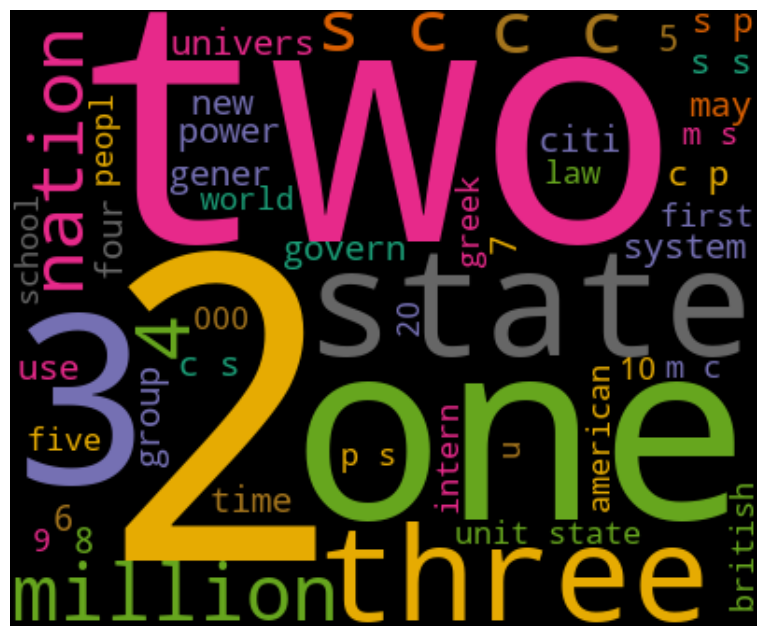

In [10]:
wc_answer = WordCloud(width=400, height=330, max_words=50, colormap="Dark2", include_numbers=True).generate(df_sentences['text'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(wc_answer, interpolation='bilinear')
plt.axis("off")
plt.show()